In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import ascii
from collections import defaultdict


In [2]:
#Make a code that figures out which filters are used for a cluster:
#Could read in one SED for each cluster, take first column, which is the wavelengths observed, check against effective wavelengths I found before?

#Calling the function finding_eff_waves into an array of effective wavelengths
from Finding_Effective_Wavelengths import finding_eff_waves
all_filters = finding_eff_waves() #Here's a dictionary of all kilter names and their effective wavelength, example key = 'u'
print("Effective K band wavelength = ", all_filters['Ks'])
print("K band wavelength from SEDs = ", 21485.08)

#Note to self: I've decided to do this part later. For now I should be able to have the plot print the wavelenght its using
#onto the plot to keep track of which filter it is, and I can go in later with this code to figure out which filter name
#corresponds to that wavelength. tldr: I dont wanna do this rn


Effective K band wavelength =  21592.313483634916
K band wavelength from SEDs =  21485.08


In [4]:
#Define a function that will take in the galaxy name, desired filter:


fluxpath = r'''C:\Users\Anna\PHOTOMETRY\BESTFIT_SEDs\EAZY\for_greg'''
flux_dat_all = {} #initialize empty dictionary, not sure I still need this
redpath = r'''C:\Users\Anna\PHOTOMETRY\SPECZ_MATCHED'''
filename = redpath + "\compilation_SpARCS-0035.dat" 
red_dat = ascii.read(filename)
parapath = r'''C:\Users\Anna\Learning-Python-master\SpARCS-0035_totalall_HAWKIKs.cat'''
para_dat = ascii.read(parapath)

good_flux = 10**0.8 #good_flux corresponds to k band mag < 23
indices = np.where((red_dat['spec_z'] > 0) & (para_dat['totmask'] == 0) & (para_dat['K_flag'] == 0) & (para_dat['K_star'] <0.97))# & (para_dat['HAWKIKs'] > good_flux))
indices = indices[0]
izspec = [x+1 for x in indices]



for galaxy in izspec:
    name = "\SpARCS-0035_totalall_Ks_" + str(galaxy) + ".obs_sed" #Should build the file name from path to file name
    imstr = fluxpath + name
    flux_dat = ascii.read(imstr) #will overwrite each time
    flux_dat_all[str(galaxy)] = {} #initialize
    flux_dat_all[str(galaxy)]['lambda'] = np.array(flux_dat['lambda'])
    flux_dat_all[str(galaxy)]['flux_cat'] = np.array(flux_dat['flux_cat'])
    flux_dat_all[str(galaxy)]['err_cat'] = np.array(flux_dat['err_cat'])
    flux_dat_all[str(galaxy)]['err_full'] = np.array(flux_dat['err_full'])
    flux_dat_all[str(galaxy)]['tempa_z'] = np.array(flux_dat['tempa_z'])
    flux_dat_all[str(galaxy)]['tempa_zprior'] = np.array(flux_dat['tempa_zprior'])
    flux_dat_all[str(galaxy)]['zspec'] = np.array(red_dat[galaxy-1]['spec_z']) #unlike others, need to specify which galaxy with [n] because red_dat has all in one file
#print(len(flux_dat_all['1198']['flux_cat']))


redshift = {}     
dat = {}
mod = {}
for galaxy in izspec:
    redshift[str(galaxy)] = (flux_dat_all[str(galaxy)]['zspec'])
    dat[str(galaxy)] = {} #apparently I have to initialize these in here? I don't know why, but I get a "Key Error" if I dont
    mod[str(galaxy)] = {}
    for filt in range(len(flux_dat_all[str(galaxy)]['flux_cat'])): #can't do range(13) because some galaxies are missing filters
        dat[str(galaxy)][filt] = flux_dat_all[str(galaxy)]['flux_cat'][filt] #0th should be the k band catalog flux
        mod[str(galaxy)][filt] = (flux_dat_all[str(galaxy)]['tempa_zprior'][filt]) 
        
#print(dat) prints catalog flux for each galaxy (indexed by string name of galaxy) and each filter (indexed 0-11)
print(redshift['1198'])
print(mod['1198'])

0.469
{0: 41.47551, 1: 4.35114, 2: 5.316381, 3: 9.429767, 4: 15.88747, 5: 21.50452, 6: 25.55493, 7: 27.52595, 8: 31.3088, 9: 27.38753, 10: 20.12266, 11: 8.184291}


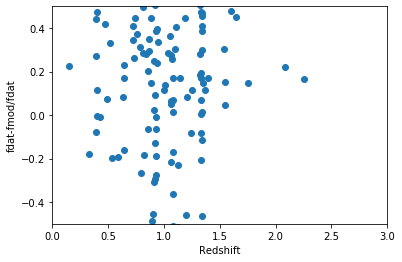

In [28]:
#Let's start with galaxy 481, all filters
#mod['481'] is the model flux, dat['481'] is the template flux, and redshift['481'] is the x values
#print(redshift)

def makeresidual (filt):
    x = []
    fdat_k = []
    fmod_k = []
    i = filt 
    for galaxy in izspec:
        if len(flux_dat_all[str(galaxy)]['flux_cat']) == 13: #IF this is set to 12, only 3 print, presumably these are the only galaxies without the extra filter
            x.append(redshift[str(galaxy)])
            fdat_k.append(dat[str(galaxy)][i])
            fmod_k.append(mod[str(galaxy)][i])

    fmod_k = np.array(fmod_k)
    fdat_k = np.array(fdat_k)
    y = (fdat_k - fmod_k)/fdat_k

    plt.scatter(x,y)
    plt.xlabel("Redshift")
    plt.ylabel("fdat-fmod/fdat")
    plt.axis([0,3, -0.5, 0.5])

makeresidual(12)

#Notes for me:
#So this code only works for the filters in which there is is a flux for every galaxy in that filter, so now I need to
#actually figure out how to call filters by name instead of index number, and also figure out what to do with galaxies
#where there is a filter missing (I could make the missing line zeros, but then when plotted, those galaxy's points would
# show up somehow still, so it'd be better to throw out those galaxies just for that filter?)
#To call filters by name I will also need to make the code that takes the filter's wavelength and matches it to its filter
#name from my function Finding_Effective_Wavelengths, within some range of angstroms

#Also, I'd love to automate all the above nested loops into a function if that's possible?

